In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#read csv file
df = pd.read_csv('housing affordability.csv',delimiter=None, quotechar="'")


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 99 columns):
CONTROL                64535 non-null int64
AGE1                   64535 non-null int64
METRO3                 64535 non-null int64
REGION                 64535 non-null int64
LMED                   64535 non-null int64
FMR                    64535 non-null int64
L30                    64535 non-null int64
L50                    64535 non-null int64
L80                    64535 non-null int64
IPOV                   64535 non-null int64
BEDRMS                 64535 non-null int64
BUILT                  64535 non-null int64
STATUS                 64535 non-null int64
TYPE                   64535 non-null int64
VALUE                  64535 non-null int64
VACANCY                64535 non-null int64
TENURE                 64535 non-null int64
NUNITS                 64535 non-null int64
ROOMS                  64535 non-null int64
WEIGHT                 64535 non-null float64
PER      

Data wrangling to remove outliers, fill missing values
We used quotechar to remove the single quotes from the data 
Remove all duplicate columns with formatted data (starts with 'FMT')

In [3]:
#Remove all columns starting with 'FMT'
df = df.drop(df.filter(regex='FMT').columns, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 74 columns):
CONTROL             64535 non-null int64
AGE1                64535 non-null int64
METRO3              64535 non-null int64
REGION              64535 non-null int64
LMED                64535 non-null int64
FMR                 64535 non-null int64
L30                 64535 non-null int64
L50                 64535 non-null int64
L80                 64535 non-null int64
IPOV                64535 non-null int64
BEDRMS              64535 non-null int64
BUILT               64535 non-null int64
STATUS              64535 non-null int64
TYPE                64535 non-null int64
VALUE               64535 non-null int64
VACANCY             64535 non-null int64
TENURE              64535 non-null int64
NUNITS              64535 non-null int64
ROOMS               64535 non-null int64
WEIGHT              64535 non-null float64
PER                 64535 non-null int64
ZINC2               64535 no

In [10]:
# Data cleaning
# Remove missing values and negative values for AGE and home value
#Use fillna method for ZINC2
df.loc[df.VALUE < 5 ] =np.nan
df.loc[df.VALUE > 1500000 ] =np.nan
df.loc[df.AGE1 <5]=np.nan
df.loc[df.ZINC2 < 1000] =np.nan
df.ZINC2 = df.ZINC2.fillna(method='ffill').fillna(method ='bfill')

df=df[df['VALUE'].notnull()]
df=df[df['AGE1'].notnull()]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34339 entries, 0 to 64521
Data columns (total 74 columns):
CONTROL             34339 non-null float64
AGE1                34339 non-null float64
METRO3              34339 non-null float64
REGION              34339 non-null float64
LMED                34339 non-null float64
FMR                 34339 non-null float64
L30                 34339 non-null float64
L50                 34339 non-null float64
L80                 34339 non-null float64
IPOV                34339 non-null float64
BEDRMS              34339 non-null float64
BUILT               34339 non-null float64
STATUS              34339 non-null float64
TYPE                34339 non-null float64
VALUE               34339 non-null float64
VACANCY             34339 non-null float64
TENURE              34339 non-null float64
NUNITS              34339 non-null float64
ROOMS               34339 non-null float64
WEIGHT              34339 non-null float64
PER                 34339 non-n

In [177]:
#Check if there are any null values
df.isnull().sum()

CONTROL             0
AGE1                0
METRO3              0
REGION              0
LMED                0
FMR                 0
L30                 0
L50                 0
L80                 0
IPOV                0
BEDRMS              0
BUILT               0
STATUS              0
TYPE                0
VALUE               0
VACANCY             0
TENURE              0
NUNITS              0
ROOMS               0
WEIGHT              0
PER                 0
ZINC2               0
ZADEQ               0
ZSMHC               0
STRUCTURETYPE       0
OWNRENT             0
UTILITY             0
OTHERCOST           0
COST06              0
COST12              0
                   ..
INCRELAMIPCT        0
INCRELAMICAT        0
INCRELPOVPCT        0
INCRELPOVCAT        0
INCRELFMRPCT        0
INCRELFMRCAT        0
COST06RELAMIPCT     0
COST06RELAMICAT     0
COST06RELPOVPCT     0
COST06RELPOVCAT     0
COST06RELFMRPCT     0
COST06RELFMRCAT     0
COST08RELAMIPCT     0
COST08RELAMICAT     0
COST08RELP

EDA --Exploratory Data Analyis

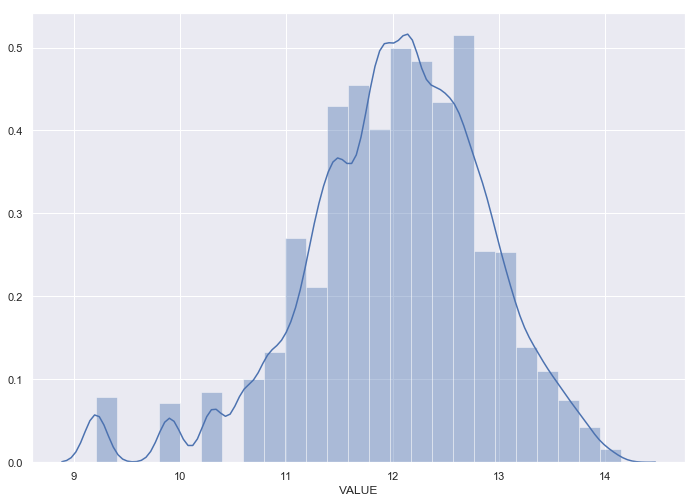

count      34339.00
mean      231919.97
std       191595.55
min        10000.00
25%       100000.00
50%       180000.00
75%       300000.00
max      1400000.00
Name: VALUE, dtype: float64

In [16]:
# Value of the house--log scale used for better visualization of the distribution

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(np.log(df['VALUE']), bins=25)
plt.show()
df.VALUE.describe().round(2)

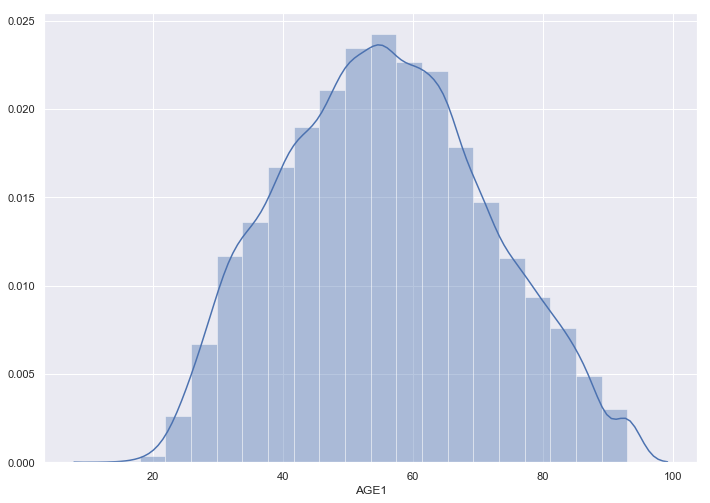

count    34339.00
mean        55.74
std         15.70
min         14.00
25%         44.00
50%         55.00
75%         66.00
max         93.00
Name: AGE1, dtype: float64

In [18]:
#Histogram of head of household age

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['AGE1'], bins=20)
plt.show()
df.AGE1.describe().round(2)

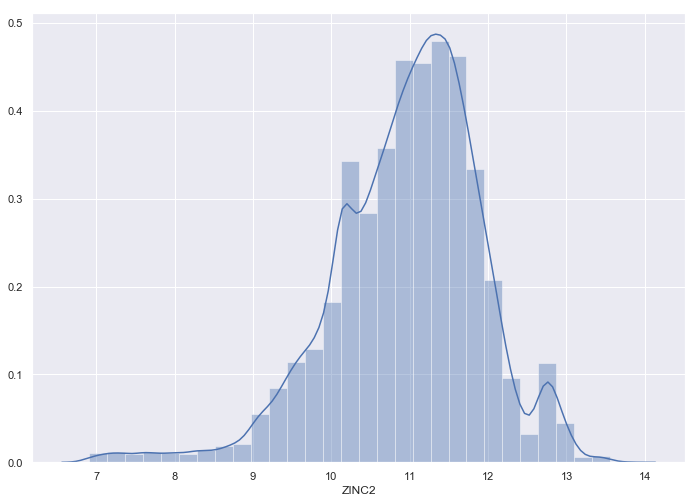

count     34339.00
mean      85574.39
std       81749.76
min        1000.00
25%       33066.00
50%       64721.00
75%      108187.00
max      973587.00
Name: ZINC2, dtype: float64

In [14]:
#Household income --log scale used to study the distribution
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(np.log(df['ZINC2']), bins=30)
plt.show()
df.ZINC2.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
METRO3,,,,,,,,
1.0,7811.0,233642.30,208241.55,10000.0,90000.0,170000.0,300000.0,1350000.0
2.0,14560.0,267257.55,202621.43,10000.0,130000.0,210000.0,350000.0,1400000.0
3.0,5123.0,227382.39,172433.49,10000.0,110000.0,180000.0,300000.0,1350000.0
4.0,2097.0,152594.18,123848.68,10000.0,80000.0,120000.0,190000.0,1240000.0
5.0,4748.0,160652.91,133056.45,10000.0,80000.0,130000.0,200000.0,1100000.0


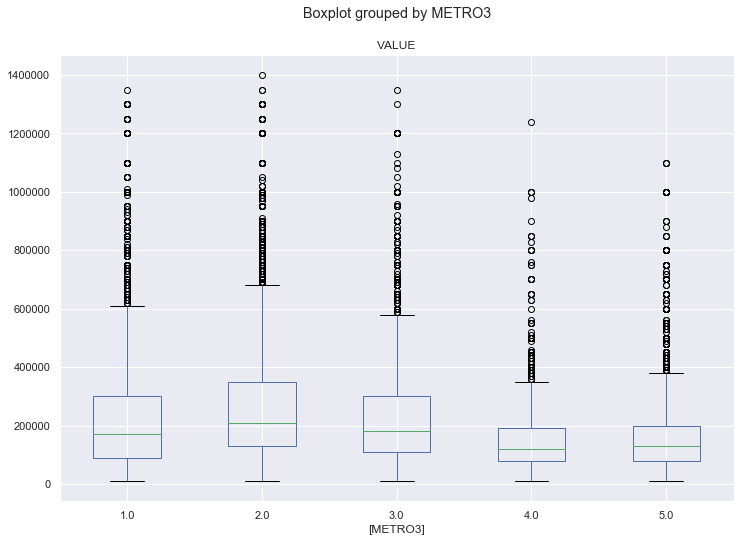

In [39]:
# Boxplot of Value based on METRO data. 1=Central City, 2-5=subarban areas (2=closer to cenral city)
# Univariate analysis of the Response data - bar plot
df.boxplot(column=['VALUE'],by = ['METRO3'])
df.VALUE.groupby(df.METRO3).describe().round(2)

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
1.0,8395.0,298284.69,201480.20,10000.0,150000.0,250000.0,400000.0,1400000.0
2.0,10027.0,172948.04,141814.09,10000.0,80000.0,140000.0,210000.0,1350000.0
3.0,10392.0,188901.08,161205.12,10000.0,90000.0,150000.0,240000.0,1300000.0
4.0,5525.0,319020.81,238835.12,10000.0,150000.0,250000.0,420000.0,1350000.0


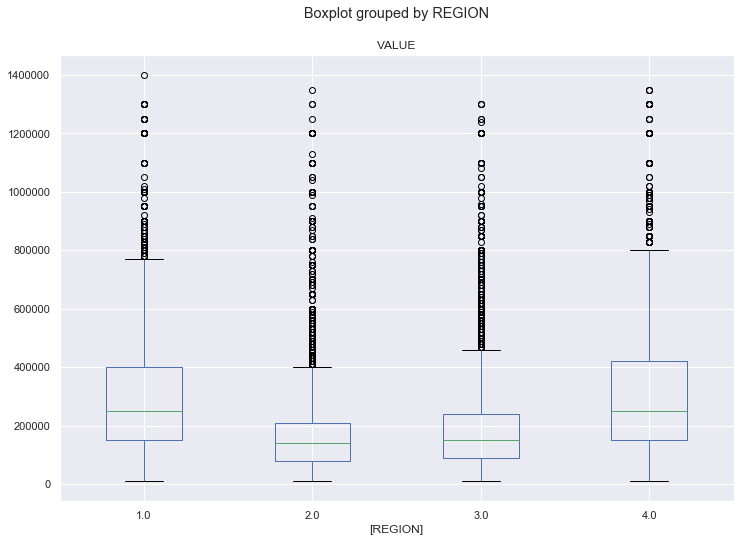

In [40]:
# Boxplot of Value based on REGION data (1=North East, 2=Mid West, 3=South, 4=West)
# Univariate analysis of the Response data - bar plot
df.boxplot(column=['VALUE'],by = ['REGION'])
df.VALUE.groupby(df.REGION).describe().round(2)

Dimension reduction using feature selection

In [19]:
# Correlation matrix
# Remove dependent variable and all the nan variable
df1 =df.loc[:,'AGE1':'BURDEN']
df1=df1.drop(['VALUE','STATUS', 'VACANCY', 'TENURE', 'OWNRENT', 'ASSISTED'], axis=1)
df1.corr().round(2)

,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,...,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,ABL80,ABLMED,BURDEN
AGE1,1.00,0.05,-0.01,-0.01,-0.05,-0.25,-0.25,-0.28,-0.43,-0.11,...,-0.01,-0.25,-0.25,-0.28,-0.26,-0.06,-0.06,-0.07,-0.06,0.07
METRO3,0.05,1.00,0.07,-0.43,-0.39,-0.35,-0.35,-0.37,-0.05,-0.01,...,-0.43,-0.35,-0.35,-0.37,-0.34,-0.38,-0.38,-0.41,-0.36,-0.04
REGION,-0.01,0.07,1.00,-0.38,-0.01,-0.25,-0.25,-0.22,-0.01,0.02,...,-0.38,-0.25,-0.25,-0.22,-0.28,-0.28,-0.28,-0.25,-0.31,-0.03
LMED,-0.01,-0.43,-0.38,1.00,0.66,0.72,0.72,0.62,0.06,0.07,...,1.00,0.72,0.72,0.62,0.77,0.82,0.82,0.74,0.86,0.05
FMR,-0.05,-0.39,-0.01,0.66,1.00,0.70,0.70,0.66,0.23,0.47,...,0.66,0.70,0.70,0.66,0.63,0.88,0.88,0.87,0.79,0.04
L30,-0.25,-0.35,-0.25,0.72,0.70,1.00,1.00,0.98,0.68,0.26,...,0.72,1.00,1.00,0.98,0.97,0.77,0.77,0.74,0.73,-0.01
L50,-0.25,-0.35,-0.25,0.72,0.70,1.00,1.00,0.98,0.68,0.26,...,0.72,1.00,1.00,0.98,0.97,0.77,0.77,0.74,0.73,-0.01
L80,-0.28,-0.37,-0.22,0.62,0.66,0.98,0.98,1.00,0.74,0.27,...,0.62,0.98,0.98,1.00,0.93,0.71,0.71,0.72,0.66,-0.01
IPOV,-0.43,-0.05,-0.01,0.06,0.23,0.68,0.68,0.74,1.00,0.35,...,0.06,0.68,0.68,0.74,0.67,0.23,0.23,0.26,0.23,-0.06
BEDRMS,-0.11,-0.01,0.02,0.07,0.47,0.26,0.26,0.27,0.35,1.00,...,0.07,0.26,0.26,0.27,0.28,0.54,0.54,0.61,0.55,-0.01


The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation

In [43]:
#Drop variables with high correlation
df2 =df1.drop(['L30','L50', 'L80',  'COST06', 'COST08','COST12', 'GL30','GL50', 'GL80', 'ABL30',
              'ABL50','ABL80','TOTSAL', 'APLMED','ABLMED','GLMED','COSTMED', 'PER','TYPE'], axis=1)


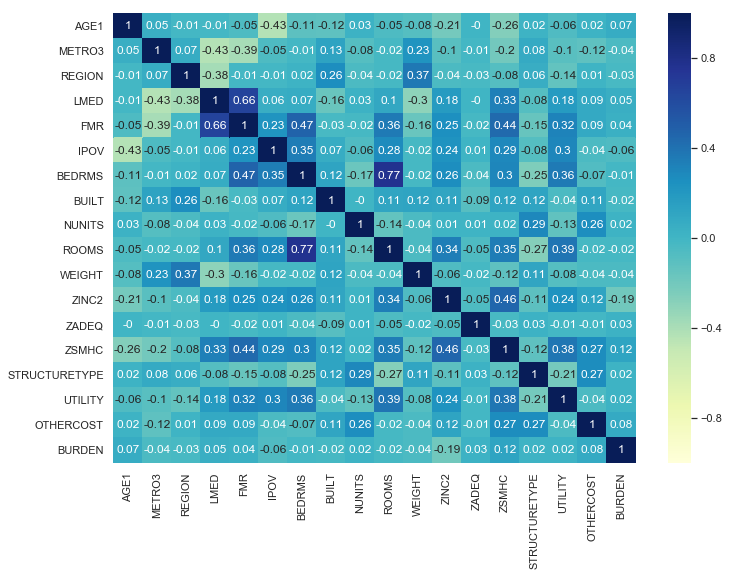

In [44]:
#Correlation matrix to check for correlation between variables

correlation_matrix = df2.corr().round(2)

# annot = True to print the values inside the square

sns.heatmap(data=correlation_matrix, annot=True, vmin= -1, vmax =1, center=0.0, cmap="YlGnBu")

In [45]:
# Dimension reduction using feature selection
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, max_depth=10)
df2=pd.get_dummies(df2)
model.fit(df2,df.VALUE)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

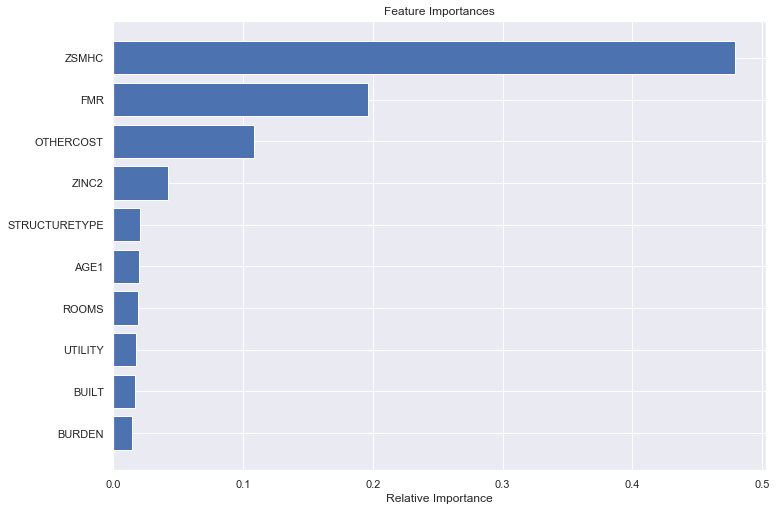

In [46]:
#plot feature importance
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

C:\Users\GG\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


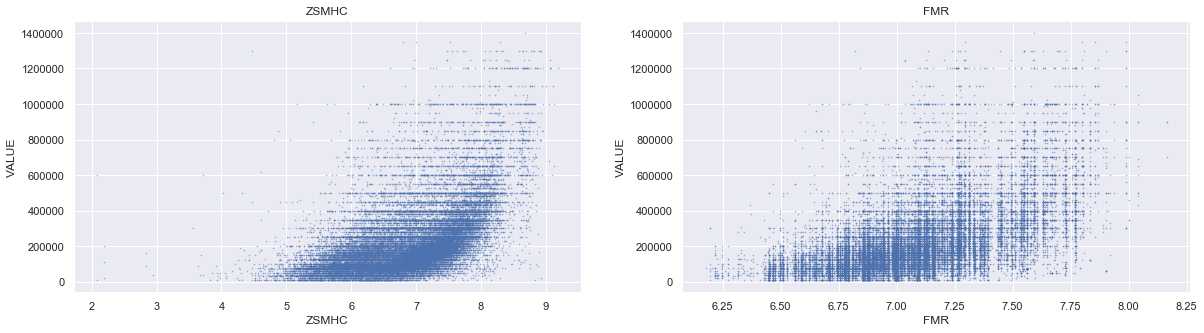

In [72]:
#Scatter plots for 
# VALUE v. Monthly hosung costs (ZSMHC)
# VALUE v. Fair Market Rent
plt.figure(figsize=(20, 5))
features = ['ZSMHC','FMR']
target = df['VALUE']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(np.log(x), y, marker='o', alpha=0.5, s=0.3)
    #plt.scatter(np.log(x), np.sqrt(y), marker='o', alpha=0.3, s=0.15)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('VALUE')

C:\Users\GG\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


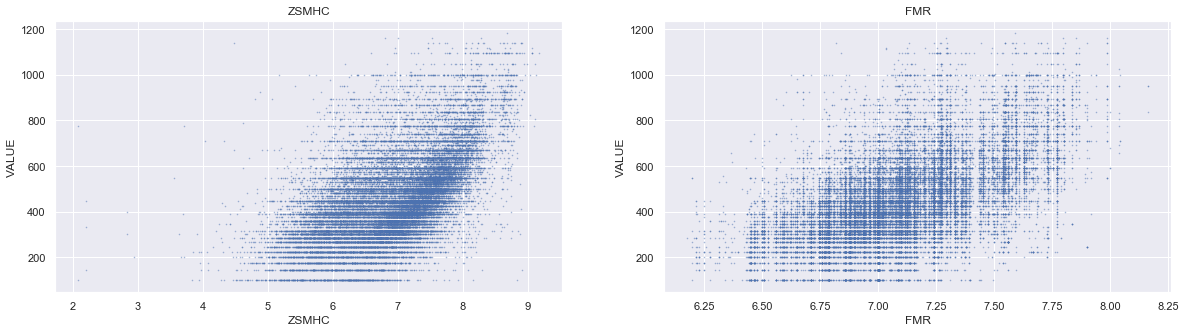

In [73]:
#Scatter plots same as above but taking sqrt of y to make it linear
# VALUE v. Monthly hosung costs (ZSMHC)
# VALUE v. Fair Market Rent
plt.figure(figsize=(20, 5))
features = ['ZSMHC','FMR']
target = df['VALUE']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(np.log(x), np.sqrt(y), marker='o', alpha=0.5, s=0.3)
   
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('VALUE')

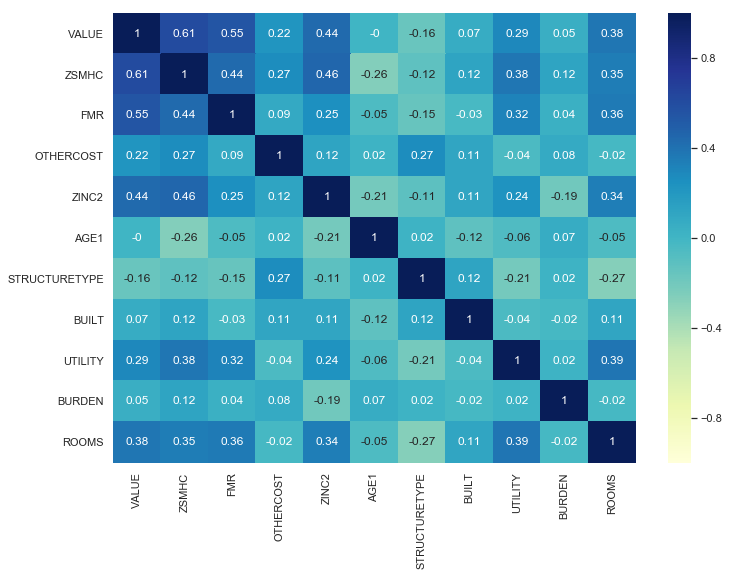

In [47]:
#Correlation matrix to check for correlation between variables
df3 =df[['VALUE','ZSMHC','FMR', 'OTHERCOST','ZINC2','AGE1','STRUCTURETYPE', 'BUILT','UTILITY',  'BURDEN','ROOMS' ]]

correlation_matrix = df3.corr().round(2)

# annot = True to print the values inside the square

sns.heatmap(data=correlation_matrix, annot=True, vmin= -1, vmax =1, center=0.0, cmap="YlGnBu")

Principal Composant Analysis:
Principal component analysis is a statistical method that uses the process of linear, orthogonal transformation to transform a higher-dimensional set of features that could be possibly correlated into a lower-dimensional set of linearly uncorrelated features. These transformed and newly created features are also known as Principal Components or PCs. In any PCA transformation, the total number of PCs is always less than or equal to the initial number of features. The first principal component tries to capture the maximum variance of the original set of features.

We will use Principal component Analysis to reduce the features further from 74 (started with 99 features in the import, removed 25 duplicates)


In [104]:
#PCA
from sklearn.decomposition import PCA



Machine Learning Algorithms

In [59]:
# Data splitting into training and testing sets
from sklearn.model_selection import train_test_split

X =pd.DataFrame(df[['ZSMHC','FMR', 'OTHERCOST','ZINC2','STRUCTURETYPE', 'UTILITY','BURDEN','ROOMS']])
Y = df['VALUE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(25754, 8)
(8585, 8)
(25754,)
(8585,)


Linear Regression model

In [60]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
# Check model with R square and RSME
# model evaluation for training set
from sklearn.metrics import r2_score

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 133963.32373302113
R2 score is 0.5132958167651335


The model performance for testing set
--------------------------------------
RMSE is 132441.20984169727
R2 score is 0.5156092985302081


Support Vector Machines

In [ ]:
#SVM

Random Forest Regression

In [62]:
# Random Forest Regressor for model fit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


random_forest_model = RandomForestRegressor(random_state=1, max_depth=10)
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [63]:
# Check model with R square and RSME for RandomForestRegressor
# model evaluation for training set
from sklearn.metrics import r2_score

y_train_predict_RM = random_forest_model.predict(X_train)
rmse_RM = (np.sqrt(mean_squared_error(Y_train, y_train_predict_RM)))
r2_RM = r2_score(Y_train, y_train_predict_RM)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_RM))
print('R2 score is {}'.format(r2_RM))
print("\n")

# model evaluation for testing set
y_test_predict_RM = random_forest_model.predict(X_test)
rmse_RM = (np.sqrt(mean_squared_error(Y_test, y_test_predict_RM)))
r2_RM = r2_score(Y_test, y_test_predict_RM)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_RM))
print('R2 score is {}'.format(r2_RM))

The model performance for training set
--------------------------------------
RMSE is 104202.42118097054
R2 score is 0.7055247014155761


The model performance for testing set
--------------------------------------
RMSE is 123925.14702122686
R2 score is 0.5758998709518262


Random Forest Classifier has better R2 scores compared to linear model. We see that data was not lieanr from scatter plots VALUE v. independent variables showed non linear exponential relatioship.
RSME scores are high for both linear and Random Forest models.
In order to minimize the overfitting, cross validation of the training dataset will be done.